In [ ]:
# Import panda, numpy, matplotlib.pyplot, seaborn, ipywidgets 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from ipywidgets 
import interact, Dropdown, Layout

In [ ]:
# Import dataset

In [2]:
df = pd.read_csv('C:/Users/Acer/Downloads/math for machine learning/customer_transactions_contaminated.csv')

In [ ]:
# Count initial duplicates

In [3]:
initial_duplicate_count = df.duplicated().sum()
print(f'Initial duplicate count: {initial_duplicate_count}')

Initial duplicate count: 185


In [ ]:
# Drop duplicate rows

In [4]:
df_cleaned = df.drop_duplicates()

In [ ]:
# Verify duplicate count after dropping

In [5]:
duplicate_count_after_dropping = df_cleaned.duplicated().sum()
print(f'Duplicate count after dropping: {duplicate_count_after_dropping}')

Duplicate count after dropping: 0


In [ ]:
# Count null values in each column

In [6]:
null_counts = df_cleaned.isnull().sum()
print('Null values in each column:')
print(null_counts)

Null values in each column:
CustomerID           0
TransactionID        0
TransactionDate      0
Amount             283
ProductCategory    282
PaymentMethod        0
dtype: int64


In [ ]:
# List of null and non-numeric values

In [7]:
df = pd.DataFrame(df)

def is_numeric(value):
    try:
        float(value)
        return True
    except (ValueError, TypeError):
        return False

non_numeric_values = df[~df['Amount'].apply(is_numeric)]
nan_values = df[df['Amount'].isna()]
negative_values = df[df['Amount'].apply(lambda x: is_numeric(x) and float(x) < 0)]
all_relevant_values = pd.concat([non_numeric_values, nan_values, negative_values])
unique_values = all_relevant_values['Amount'].unique()

result_string = ', '.join(str(value) for value in unique_values if pd.notna(value)) + (', NaN' if nan_values.shape[0] > 0 else '')

print('Null and Non-numeric values:')
print(result_string)

Null and Non-numeric values:
Free, -100, -100.0, NaN


In [ ]:
# Replace Free with 0

In [28]:
df['Amount'] = df['Amount'].replace('Free', 0)

def is_numeric(value):
    try:
        float(value)  # Attempt to convert to float
        return True
    except (ValueError, TypeError):
        return False

non_numeric_values = df[~df['Amount'].apply(is_numeric)]
nan_values = df[df['Amount'].isna()]
negative_values = df[df['Amount'].apply(lambda x: is_numeric(x) and float(x) < 0)]
all_relevant_values = pd.concat([non_numeric_values, nan_values, negative_values])
unique_values = all_relevant_values['Amount'].unique()

result_string = ', '.join(str(value) for value in unique_values if pd.notna(value)) + (', NaN' if nan_values.shape[0] > 0 else '')

In [ ]:
#Verify change

In [9]:
print('Null and Non-numeric values:')
print(result_string)

Null and Non-numeric values:
-100, -100.0, NaN


In [ ]:
# Check current data types of the DataFrame

In [10]:
print('Current data types:')
print(df_cleaned.dtypes)

Current data types:
CustomerID         object
TransactionID      object
TransactionDate    object
Amount             object
ProductCategory    object
PaymentMethod      object
dtype: object


In [ ]:
# Convert data types

In [11]:
df_cleaned['Amount'] = pd.to_numeric(df_cleaned['Amount'], errors='coerce')
df_cleaned['TransactionDate'] = pd.to_datetime(df_cleaned['TransactionDate'], errors='coerce')
df_cleaned['ProductCategory'] = df_cleaned['ProductCategory'].astype('category')
df_cleaned['PaymentMethod'] = df_cleaned['PaymentMethod'].astype('category')

In [ ]:
# Verify data types after conversion

In [12]:
print('\nUpdated data types after conversion:')
print(df_cleaned.dtypes)


Updated data types after conversion:
CustomerID                 object
TransactionID              object
TransactionDate    datetime64[ns]
Amount                    float64
ProductCategory          category
PaymentMethod            category
dtype: object


In [ ]:
# Calculating relevant statistics

In [13]:
mean = df_cleaned['Amount'].mean()
median = df_cleaned['Amount'].median()
min_value = df_cleaned['Amount'].min()
max_value = df_cleaned['Amount'].max()


print("Basic Statistics for Amount:")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Min: {min_value}")
print(f"Max: {max_value}")

Basic Statistics for Amount:
Mean: 489.78891931902285
Median: 496.625
Min: -100.0
Max: 999.86


In [ ]:
# Calculating Range (Max - Min)

In [14]:
df_cleaned['Amount'] = pd.to_numeric(df_cleaned['Amount'], errors='coerce')

age_range = df_cleaned['Amount'].max() - df_cleaned['Amount'].min()
print(f'Range: {age_range}')

Range: 1099.8600000000001


In [ ]:
# Calculating Interquartile Range

In [15]:
Q1 = df_cleaned['Amount'].quantile(0.25)
Q3 = df_cleaned['Amount'].quantile(0.75)
iqr = Q3 - Q1

print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {iqr}')

Q1: 228.24
Q3: 746.6975
IQR: 518.4575


In [ ]:
# Calculating Variance and Standard Deviation

In [16]:
variance = df_cleaned['Amount'].var()
std_dev = df_cleaned['Amount'].std()

print(f'Variance: {variance}')
print(f'Standard Deviation: {std_dev}')

Variance: 89544.25008391129
Standard Deviation: 299.23945275299394


In [ ]:
# Plotting the distribution of the 'Amount' column

C:\Users\Acer\AppData\Local\Temp\ipykernel_18616\3024455704.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned['Amount'], color='blue', shade=True)


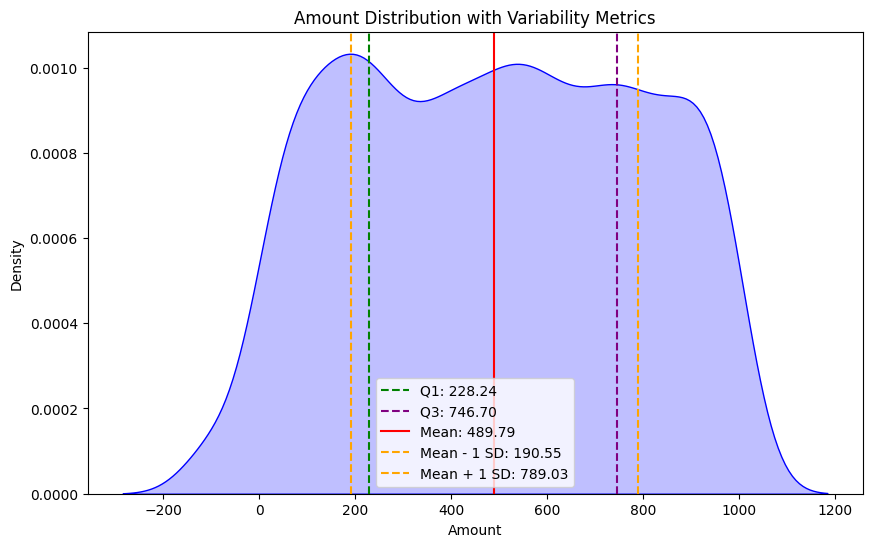

In [17]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_cleaned['Amount'], color='blue', shade=True)

# Add vertical lines for metrics
plt.axvline(Q1, color='green', linestyle='--', label=f'Q1: {Q1:.2f}')
plt.axvline(Q3, color='purple', linestyle='--', label=f'Q3: {Q3:.2f}')
plt.axvline(mean, color='red', linestyle='-', label=f'Mean: {mean:.2f}')
plt.axvline(mean - std_dev, color='orange', linestyle='--', label=f'Mean - 1 SD: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='--', label=f'Mean + 1 SD: {mean + std_dev:.2f}')

# Set title and labels
plt.title('Amount Distribution with Variability Metrics')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
# Skipping outliers from the 'Age' column

In [18]:
df_cleaned['Amount'] = pd.to_numeric(df_cleaned['Amount'], errors='coerce')
df_filtered = df_cleaned[df_cleaned['Amount'] >= 0]

In [ ]:
# Measures of variability (excluding the outliers)

In [ ]:
# Calculating relevant statistics (excluding the outliers)

In [19]:
mean_filtered = df_filtered['Amount'].mean()
median_filtered = df_filtered['Amount'].median()
min_filtered = df_filtered['Amount'].min()
max_filtered = df_filtered['Amount'].max()

print("Basic Statistics for Amount (Filtered):")
print(f"Mean: {mean_filtered}")
print(f"Median: {median_filtered}")
print(f"Min: {min_filtered}")
print(f"Max: {max_filtered}")

Basic Statistics for Amount (Filtered):
Mean: 498.65126220886555
Median: 504.14
Min: 0.0
Max: 999.86


In [ ]:
# Calculating Range (excluding the outliers)

In [20]:
amount_range_filtered = df_filtered['Amount'].max() - df_filtered['Amount'].min()
print(f'Range: {amount_range_filtered}')

Range: 999.86


In [ ]:
# Calculating Interquartile Range (excluding the outliers)

In [21]:
Q1_filtered = df_filtered['Amount'].quantile(0.25)
Q3_filtered = df_filtered['Amount'].quantile(0.75)
iqr_filtered = Q3_filtered - Q1_filtered

print(f'Q1: {Q1_filtered}')
print(f'Q3: {Q3_filtered}')
print(f'IQR: {iqr_filtered}')

Q1: 237.985
Q3: 748.76
IQR: 510.775


In [ ]:
# Calculating Variance and Standard Deviation (excluding the outliers)

In [22]:
variance_filtered = df_filtered['Amount'].var()
std_dev_filtered = df_filtered['Amount'].std()

print(f'Variance: {variance}')
print(f'Standard Deviation: {std_dev}')

Variance: 89544.25008391129
Standard Deviation: 299.23945275299394


In [ ]:
# Plotting the distribution of the 'Amount' column (excluding the outliers)

C:\Users\Acer\AppData\Local\Temp\ipykernel_18616\1537699666.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_filtered['Amount'], color='blue', shade=True, bw_adjust=0.5)


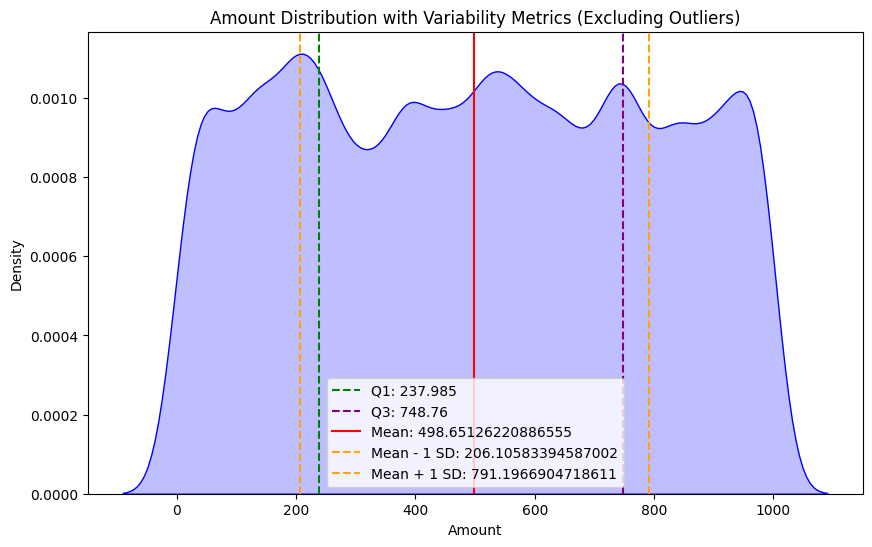

In [23]:
plt.figure(figsize=(10, 6))

# Use a smaller bandwidth to make peaks around 0 more visible
sns.kdeplot(df_filtered['Amount'], color='blue', shade=True, bw_adjust=0.5)

# Plot statistical lines
plt.axvline(Q1_filtered, color='green', linestyle='--', label=f'Q1: {Q1_filtered}')
plt.axvline(Q3_filtered, color='purple', linestyle='--', label=f'Q3: {Q3_filtered}')
plt.axvline(mean_filtered, color='red', linestyle='-', label=f'Mean: {mean_filtered}')
plt.axvline(mean_filtered - std_dev_filtered, color='orange', linestyle='--', label=f'Mean - 1 SD: {mean_filtered - std_dev_filtered}')
plt.axvline(mean_filtered + std_dev_filtered, color='orange', linestyle='--', label=f'Mean + 1 SD: {mean_filtered + std_dev_filtered}')

plt.title('Amount Distribution with Variability Metrics (Excluding Outliers)')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
# Plotting BOTH the distribution of the 'Amount' column side by side

C:\Users\Acer\AppData\Local\Temp\ipykernel_18616\482463123.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned['Amount'], color='blue', shade=True, ax=axes[0])
C:\Users\Acer\AppData\Local\Temp\ipykernel_18616\482463123.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_filtered['Amount'], color='blue', shade=True, bw_adjust=0.5, ax=axes[1])


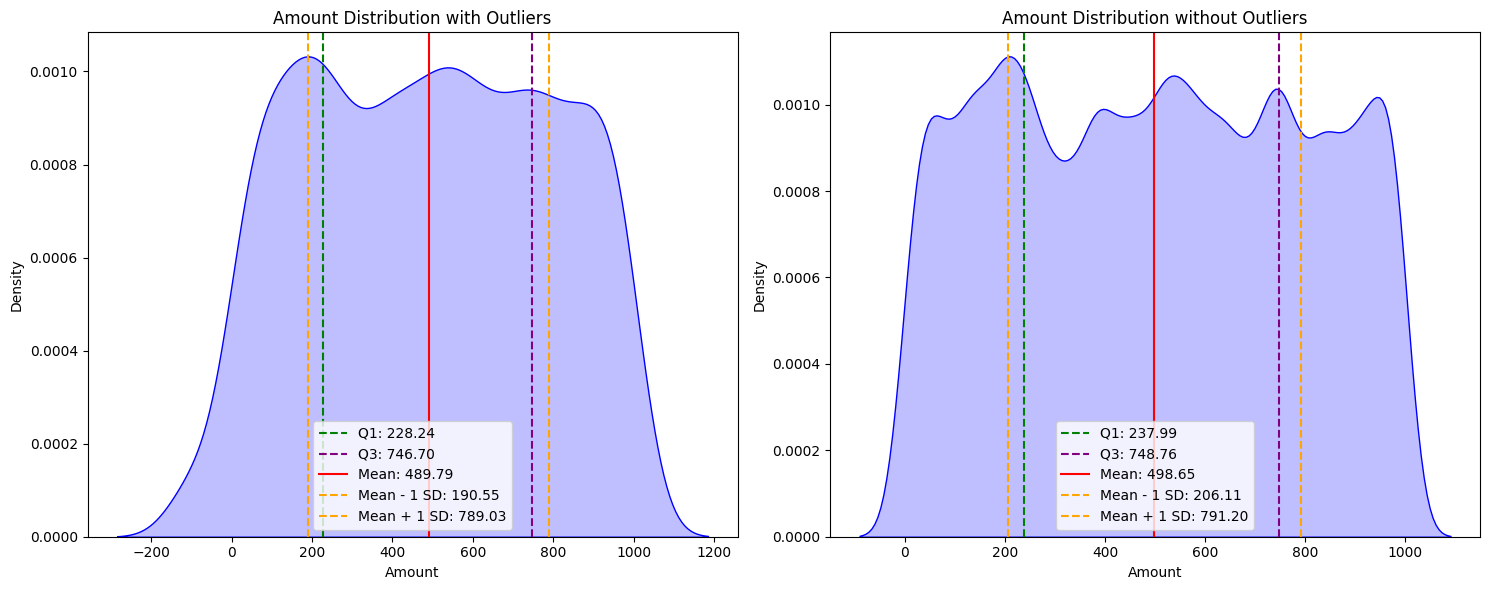

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned and df_filtered are already defined and processed

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- First Plot: Original data with outliers ---
sns.kdeplot(df_cleaned['Amount'], color='blue', shade=True, ax=axes[0])

# Calculate statistics for cleaned data
Q1 = df_cleaned['Amount'].quantile(0.25)
Q3 = df_cleaned['Amount'].quantile(0.75)
mean = df_cleaned['Amount'].mean()
std_dev = df_cleaned['Amount'].std()

# Plot vertical lines for Q1, Q3, mean, and standard deviations on the first plot
axes[0].axvline(Q1, color='green', linestyle='--', label=f'Q1: {Q1:.2f}')
axes[0].axvline(Q3, color='purple', linestyle='--', label=f'Q3: {Q3:.2f}')
axes[0].axvline(mean, color='red', linestyle='-', label=f'Mean: {mean:.2f}')
axes[0].axvline(mean - std_dev, color='orange', linestyle='--', label=f'Mean - 1 SD: {mean - std_dev:.2f}')
axes[0].axvline(mean + std_dev, color='orange', linestyle='--', label=f'Mean + 1 SD: {mean + std_dev:.2f}')

# Set labels and title for the first plot
axes[0].set_title('Amount Distribution with Outliers')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Density')
axes[0].legend()

# --- Second Plot: Filtered data without outliers ---
sns.kdeplot(df_filtered['Amount'], color='blue', shade=True, bw_adjust=0.5, ax=axes[1])

# Calculate statistics for filtered data
Q1_filtered = df_filtered['Amount'].quantile(0.25)
Q3_filtered = df_filtered['Amount'].quantile(0.75)
mean_filtered = df_filtered['Amount'].mean()
std_dev_filtered = df_filtered['Amount'].std()

# Plot vertical lines for Q1, Q3, mean, and standard deviations on the second plot
axes[1].axvline(Q1_filtered, color='green', linestyle='--', label=f'Q1: {Q1_filtered:.2f}')
axes[1].axvline(Q3_filtered, color='purple', linestyle='--', label=f'Q3: {Q3_filtered:.2f}')
axes[1].axvline(mean_filtered, color='red', linestyle='-', label=f'Mean: {mean_filtered:.2f}')
axes[1].axvline(mean_filtered - std_dev_filtered, color='orange', linestyle='--', label=f'Mean - 1 SD: {mean_filtered - std_dev_filtered:.2f}')
axes[1].axvline(mean_filtered + std_dev_filtered, color='orange', linestyle='--', label=f'Mean + 1 SD: {mean_filtered + std_dev_filtered:.2f}')

# Set labels and title for the second plot
axes[1].set_title('Amount Distribution without Outliers')
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Density')
axes[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
#Frequency Counts

In [25]:
product_category_counts = df['ProductCategory'].value_counts()
payment_method_counts = df['PaymentMethod'].value_counts()

print("Frequency Counts for ProductCategory:")
print(product_category_counts)

print("\nFrequency Counts for PaymentMethod:")
print(payment_method_counts)


Frequency Counts for ProductCategory:
ProductCategory
Clothing           598
Electronics        595
Automotive         576
Health & Beauty    570
Home & Garden      562
Name: count, dtype: int64

Frequency Counts for PaymentMethod:
PaymentMethod
Debit Card       809
Credit Card      804
PayPal           794
Bank Transfer    793
Name: count, dtype: int64


In [ ]:
# Visualization

In [32]:
df_filtered['TransactionDate'] = pd.to_datetime(df_filtered['TransactionDate'], errors='coerce')

# Get unique categories and methods, then add 'All' option
product_categories = ['All'] + list(df_filtered['ProductCategory'].dropna().unique())
payment_methods = ['All'] + list(df_filtered['PaymentMethod'].dropna().unique())

df_filtered['Quarter'] = df_filtered['TransactionDate'].dt.to_period('Q')
quarters = df_filtered['Quarter'].dropna().unique()

# Create dropdowns with 'All' as an option
product_dropdown = Dropdown(
    options=product_categories,
    description='Product Category:',
    layout=Layout(width='250px'), 
)

payment_dropdown = Dropdown(
    options=payment_methods,
    description='Payment Method:',
    layout=Layout(width='250px'), 
)

@interact(product_category=product_dropdown, payment_method=payment_dropdown)
def plot(product_category, payment_method):
    # Apply filtering logic
    filtered_df = df_filtered.copy()
    
    if product_category != 'All':
        filtered_df = filtered_df[filtered_df['ProductCategory'] == product_category]
    
    if payment_method != 'All':
        filtered_df = filtered_df[filtered_df['PaymentMethod'] == payment_method]

    # Group by Quarter and count transactions
    transaction_count = filtered_df.groupby('Quarter').size()
    
    # Plotting the results
    plt.figure(figsize=(12, 6))  # Make the figure wider
    transaction_count.plot(kind='bar', color='#1f77b4')  # Use a distinct color palette
    plt.title('Count of Transactions by Quarter', fontsize=16)
    plt.ylabel('Count', fontsize=12)
    plt.xlabel('Transaction Date (by Quarter)', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--')  # Adjust grid to y-axis
    plt.tight_layout()  # Adjust layout to prevent clipping

    plt.xlim(-0.5, len(transaction_count.index) - 0.5)  # Adjust x-axis limits
    plt.ylim(0, transaction_count.max() + 5)  # Add space above bars
    plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_18616\954918320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['TransactionDate'] = pd.to_datetime(df_filtered['TransactionDate'], errors='coerce')
C:\Users\Acer\AppData\Local\Temp\ipykernel_18616\954918320.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Quarter'] = df_filtered['TransactionDate'].dt.to_period('Q')


interactive(children=(Dropdown(description='Product Category:', layout=Layout(width='250px'), options=('All', …

In [ ]:
# Save the cleaned DataFrame to a new CSV file

In [33]:
df_filtered.to_csv('M1 customer_transactions.csv', index=False)